# 3.1 Linear Basis Function Models

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
# Generate random data points (x,y) with gaussian noise

def data_generator(num, slope, intercept, noise_level):
    vec_x = np.random.normal(0.5, noise_level, N)
    noise = np.random.normal(0, noise_level/1.5, N)
    vec_y = []
    for i in range(num):
        x = vec_x[i]
        y = x * slope + intercept + noise[i]
        vec_y.append(y)
    return np.array(vec_x), np.array(vec_y)
    

N = 1000
data_x, data_y = data_generator(N, 0.7, 0.15, noise_level=0.1)

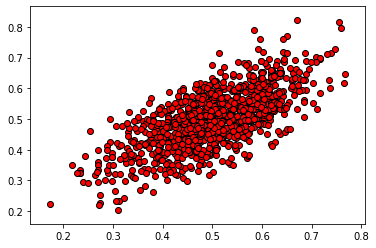

In [4]:
ax = plt.scatter(data_x, data_y, c='r', edgecolors='black');

In [20]:
# Constructing model variables

w = tf.Variable(tf.random.uniform([1], -1.0, 1.0), name='w')
b = tf.Variable(tf.zeros([1]), name='b')

In [30]:
# Using stochastic gradient decent for optimization

learning_rate = 0.5
optimizer = tf.optimizers.SGD()

In [31]:
# Optimization Process

def optimize(x, y):
    with tf.GradientTape() as g:
        g.watch(w)
        g.watch(b)

        # Constructing the model
        y_hat = w * x + b

        # Loss function: Mean squared error
        loss_mse = tf.reduce_mean(tf.square(y - y_hat), name='loss_mse')

        delta_w, delta_b = g.gradient(loss_mse, [w, b])
        w.assign_sub(learning_rate * delta_w)
        b.assign_sub(learning_rate * delta_b)
        return w, b 

In [32]:
# Training Loop 

epochs = 15
for step in range(1, epochs+1):
    for x, y in zip(data_x, data_y):
        w, b = optimize(x, y)
        
    pred_y = [w * x + b for x in data_x]
    loss_mse = tf.reduce_mean(tf.square(data_y - pred_y), name='loss_mse')
    print(f'step {step}, loss {loss_mse}')


step 1, loss 0.016319380363394538
step 2, loss 0.016319513716061405
step 3, loss 0.016319513716061405
step 4, loss 0.016319513716061405
step 5, loss 0.016319513716061405
step 6, loss 0.016319513716061405
step 7, loss 0.016319513716061405
step 8, loss 0.016319513716061405
step 9, loss 0.016319513716061405
step 10, loss 0.016319513716061405
step 11, loss 0.016319513716061405
step 12, loss 0.016319513716061405
step 13, loss 0.016319513716061405
step 14, loss 0.016319513716061405
step 15, loss 0.016319513716061405


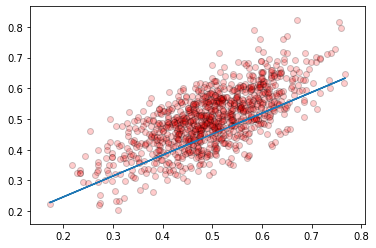

In [33]:
plt.scatter(data_x, data_y, c='r', edgecolor='black', alpha=0.2);
plt.plot(data_x, pred_y)